In [2]:
!pip install metapub
!pip install pdfplumber
!pip install fitz
!pip install frontend
!pip install PyMuPDF
!pip install PyPDF2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4ed7a6a11ed00c77d0a60939ec43096b7ba406879fa873ea4ef555fd7c737793
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [1]:
import numpy as np
import pandas as pd
import json
from metapub import PubMedFetcher
import os
os.environ['NCBI_API_KEY'] = '98e8ac592ff4555581d45d225be2d4831c08'

2025-06-14 16:28:34 b749e2ee6345 metapub.config[1388] WARNING NCBI_API_KEY was not set.


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import csv
from metapub import PubMedFetcher
import io  # Importe io para usar StringIO

# Initialize the fetcher
fetcher = PubMedFetcher()

# Define a complex query including free full text and year range
query = (
    '("postpartum hemorrhage" OR "hemorragia puerperal") AND '
    '("uterine atony" OR "hypotonia uterina") AND '
    '('
    '"new therapies" OR "novel treatment" OR "emerging therapies" OR "innovative treatment" OR '
    '"surgical treatment" OR "surgical intervention" OR "surgery" OR "minimally invasive surgery" OR '
    '"embolization" OR "uterine artery embolization" OR "ligation" OR "ligation of uterine artery" OR '
    '"balloon tamponade" OR "Bakri balloon" OR "compression sutures" OR "B-Lynch suture"'
    ') AND '
    '("2020/01/01"[PDAT] : "2025/05/31"[PDAT]) AND '
    '(free full text[sb])'
)


# Fetch PMIDs for the complex query
pmids = fetcher.pmids_for_query(query)

# Lista de propriedades para extrair com base na verificação de propriedades disponíveis
properties = [
    'abstract', 'author1_last_fm', 'author1_lastfm', 'author_list', 'authors', 'authors_str',
    'book_abstracts', 'book_accession_id', 'book_contribution_date', 'book_copyright',
    'book_date_revised', 'book_editors', 'book_history', 'book_language', 'book_medium',
    'book_publication_status', 'book_publisher', 'book_sections', 'book_synonyms',
    'book_title', 'chemicals', 'citation', 'citation_html', 'content', 'doi', 'first_page',
    'grants', 'history', 'issn', 'issue', 'journal', 'last_page', 'mesh', 'pages', 'parse_xml',
    'pii', 'pmc', 'pmid', 'pmcid', 'publication_types', 'pubmed_type', 'title', 'to_dict', 'url',
    'volume', 'volume_issue', 'xml', 'year'
]


# Nome do arquivo CSV
csv_filename = 'articleslucas.csv'

# Lista para armazenar os dados dos artigos
article_data_list = []

# Iterar pelos PMIDs e obter os dados dos artigos
for pmid in pmids:
    article = fetcher.article_by_pmid(pmid)
    article_data = []

    # Iterar pelas propriedades e extrair os dados do artigo
    for prop in properties:
        if hasattr(article, prop):
            article_data.append(getattr(article, prop))
        else:
            article_data.append('')  # Se a propriedade não estiver disponível, adicione uma string vazia

    # Adicionar os dados do artigo à lista
    article_data_list.append(article_data)

# Escrever os dados no arquivo CSV
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Escrever o cabeçalho com os nomes das propriedades
    csvwriter.writerow(properties)

    # Escrever os dados de cada artigo
    csvwriter.writerows(article_data_list)

print(f"Dados dos artigos foram salvos em {csv_filename}")


Dados dos artigos foram salvos em articleslucas.csv


In [8]:
data = pd.read_csv(csv_filename)

In [9]:
data

,abstract,author1_last_fm,author1_lastfm,author_list,authors,authors_str,book_abstracts,book_accession_id,book_contribution_date,book_copyright,...,pmcid,publication_types,pubmed_type,title,to_dict,url,volume,volume_issue,xml,year
0,"OBJECTIVES: Endometrial tuberculosis, which co...",Jiang J,JiangJ,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Jiang J', 'Xu D', 'Yang Y']",Jiang J; Xu D; Yang Y,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},article,Hysteroscopic adhesiolysis and fertility outco...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/40457790,50,50(1),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2025
1,Background Uterine balloon tamponade (UBT) has...,Santhoshi D,SanthoshiD,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Santhoshi D', 'Yaliwal RG', 'Patil N', 'Bira...",Santhoshi D; Yaliwal RG; Patil N; Biradar A,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},article,Comparative Study of the Safety and Efficacy o...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/40352012,17,17(4),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2025
2,INTRODUCTION: Etiologies of postpartum hemorrh...,Tyagi P,TyagiP,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Tyagi P', 'Anamika', 'Verma P', 'Anand D']",Tyagi P; Anamika; Verma P; Anand D,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},article,Comparative Analysis of Panicker's Vacuum Suct...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/40308400,17,17(3),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2025
3,BACKGROUND: Peripartum hysterectomy (PH) is a ...,Desalegn H,DesalegnH,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Desalegn H', 'Geta A', 'Nane D']",Desalegn H; Geta A; Nane D,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},article,"Peripartum hysterectomy: prevalence, indicatio...",<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/40275178,25,25(1),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2025
4,Objective: This study aimed to analyze and com...,Włodarczyk Z,WłodarczykZ,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Włodarczyk Z', 'Śliwka A', 'Maciocha H', 'Pa...",Włodarczyk Z; Śliwka A; Maciocha H; Paruszewsk...,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},article,The Role of Accurate Estimations of Blood Loss...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/40142668,14,14(6),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Early Postpartum Hemorrhage (EPH) is one of th...,Feduniw S,FeduniwS,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Feduniw S', 'Warzecha D', 'Szymusik I', 'Wie...",Feduniw S; Warzecha D; Szymusik I; Wielgos M,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D000078182': '...",article,"Epidemiology, prevention and management of ear...",<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/32039467,91,91(1),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2020
68,OBJECTIVE: To characterize use of uterine tamp...,Merriam AA,MerriamAA,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Merriam AA', 'Huang Y', 'Wright JD', 'Goffma...",Merriam AA; Huang Y; Wright JD; Goffman D; D'A...,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D052061': 'Res...",article,Use of Uterine Tamponade and Interventional Ra...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/32028498,135,135(3),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2020
69,BACKGROUND: Twin pregnancy has a high risk for...,Kim ML,KimML,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Kim ML', 'Hur YM', 'Ryu H', 'Lee MJ', 'Seong...",Kim ML; Hur YM; Ryu H; Lee MJ; Seong SJ; Shin JS,NaN,NaN,NaN,NaN,...,NaN,{'D016428': 'Journal Article'},art

In [10]:
data.to_csv('drive/My Drive/datalucas.csv')

In [11]:
data = pd.read_csv('drive/My Drive/datalucas.csv')

In [12]:
df = data.iloc[:,1:]

In [13]:
# Definindo as listas de termos para cada categoria a ser filtrada a partir do abstract



In [14]:
objective_terms = [
    "objective", "aim", "purpose", "goal", "research question", "hypothesis", "focus", "intent", "problem", "study design",
    "research aim", "study purpose", "research goal", "study objective", "research focus", "investigation objective", "main goal", "primary goal",
    "study hypothesis", "central aim", "primary objective", "intended purpose"
]


In [15]:
method_terms = [
    "methodology", "method", "approach", "technique", "design", "data collection", "procedure", "experiment", "analysis", "sampling",
    "instrument", "statistical analysis", "research method", "research design", "data analysis", "experimental method", "quantitative method",
    "qualitative method", "survey", "measurement", "testing", "protocol", "statistical procedure", "research approach", "empirical method",
    "data gathering", "data collection process"
]


In [16]:
result_terms = [
    "results", "findings", "outcome", "data", "analysis results", "discovery", "observation", "significant", "association", "impact",
    "difference", "effect", "conclusion", "findings indicate", "results suggest", "evidence shows", "observed", "significant difference",
    "statistical result", "outcome shows", "data analysis", "key results", "major findings", "main outcome"
]


In [17]:
conclusion_terms = [
    "conclusion", "implications", "recommendations", "consequence", "suggestion", "interpretation", "summary", "contribution",
    "practical implications", "future work", "limitations", "final thoughts", "research implications", "study conclusion", "key takeaways",
    "main conclusion", "research recommendations", "interpretation of results", "study limitations", "future directions", "policy implications"
]


In [18]:
human_health_terms = [
    # Fármacos tradicionais e recentes
    "tranexamic acid", "carbetocin", "misoprostol", "oxytocin", "carboprost", "ergometrine",
    "syntocinon", "uterotonics", "hemostatic agents",

    # Procedimentos e técnicas modernas
    "uterine balloon tamponade", "Bakri balloon", "non-pneumatic anti-shock garment",
    "uterine artery embolization", "interventional radiology", "embolization",
    "minimally invasive surgery", "laparoscopy", "laparotomy",
    "compression sutures", "B-Lynch suture", "stepwise uterine devascularization",
    "internal iliac artery ligation", "pelvic artery ligation",

    # Novas abordagens e terapias emergentes
    "point-of-care ultrasound", "damage control resuscitation", "massive transfusion protocol",
    "early warning system", "shock index", "active management of third stage labor",
    "evidence-based medicine", "clinical guidelines", "practice guidelines",
    "protocol", "treatment protocol", "randomized controlled trial", "clinical trial",
    "therapeutic strategy", "innovative treatment", "emerging therapy", "novel treatment",
    "multimodal therapy", "combined therapy", "adjunct therapy", "personalized medicine",
    "precision medicine", "digital health", "telemedicine", "health technology",

    # Resultados e monitoramento
    "treatment outcome", "treatment effectiveness", "clinical outcome", "patient recovery",
    "postpartum care", "maternal morbidity", "maternal mortality", "postpartum hemorrhage prevention"
]


In [19]:
# Filtrando os abstracts com pelo menos um termo de cada categoria
df_filtered = df[
    df['abstract'].str.contains("|".join(objective_terms), case=False, na=False) &
    df['abstract'].str.contains("|".join(method_terms), case=False, na=False) &
    df['abstract'].str.contains("|".join(result_terms), case=False, na=False) &
    df['abstract'].str.contains("|".join(conclusion_terms), case=False, na=False) &
    df['abstract'].str.contains("|".join(human_health_terms), case=False, na=False)
]

In [30]:
df_filtered['publication_types'].value_counts()

,count
publication_types,
{'D016428': 'Journal Article'},19
"{'D016428': 'Journal Article', 'D064888': 'Observational Study'}",2
"{'D016454': 'Review', 'D002363': 'Case Reports', 'D016428': 'Journal Article'}",2
"{'D016428': 'Journal Article', 'D016448': 'Multicenter Study'}",1
"{'D016428': 'Journal Article', 'D000078182': 'Systematic Review'}",1
"{'D016428': 'Journal Article', 'D016454': 'Review', 'D000078182': 'Systematic Review'}",1
"{'D016428': 'Journal Article', 'D017418': 'Meta-Analysis', 'D000078182': 'Systematic Review'}",1
"{'D003160': 'Comparative Study', 'D016428': 'Journal Article'}",1
"{'D023362': 'Evaluation Study', 'D016428': 'Journal Article'}",1


In [33]:
import ast
import pandas as pd

# Códigos MeSH dos Top 8 tipos de estudo
codigos_top8 = {
    'D064888',     # Observational Study
    'D016448',     # Multicenter Study
    'D000078182',  # Systematic Review
    'D017418',     # Meta-Analysis
    'D003160',     # Comparative Study
    'D023362',     # Evaluation Study
    'D016454',     # Review
    'D002363',     # Case Reports
}

# Função para converter string em dicionário (se necessário)
def parse_dict_if_needed(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        except:
            return {}
    return val

# Garantir que df_filtered seja uma cópia segura
df_filtered = df_filtered.copy()
df_filtered.loc[:, 'publication_types'] = df_filtered['publication_types'].apply(parse_dict_if_needed)

# Função para verificar se o dicionário contém algum dos códigos dos Top 8
def contem_top8(pub_types):
    if not isinstance(pub_types, dict):
        return False
    return any(cod in pub_types for cod in codigos_top8)

# Filtrar o DataFrame
df_final = df_filtered[df_filtered['publication_types'].apply(contem_top8)]

# Mostrar o número de artigos filtrados
print(f"Número de artigos com tipos Top 8: {len(df_final)}")

# Salvar os dados filtrados
df_final.to_csv('artigos_top8_publication_types.csv', index=False)



Número de artigos com tipos Top 8: 11


In [36]:
data_final = pd.read_csv('artigos_top8_publication_types.csv')

In [37]:
data_final

,abstract,author1_last_fm,author1_lastfm,author_list,authors,authors_str,book_abstracts,book_accession_id,book_contribution_date,book_copyright,...,pmcid,publication_types,pubmed_type,title,to_dict,url,volume,volume_issue,xml,year
0,BACKGROUND: No standard treatment guidelines h...,Jung YW,JungYW,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Jung YW', 'Kim J', 'Shin WK', 'Song SY', 'Ch...",Jung YW; Kim J; Shin WK; Song SY; Choi JS; Hyu...,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D016448': 'Mul...",article,Outcomes and prognosis of postpartum hemorrhag...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/39090705,19,19(1),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2024
1,INTRODUCTION: Uterine compressive sutures are ...,Cordeiro Féria B,CordeiroFériaB,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Cordeiro Féria B', 'Nazaré P', 'Figueiredo J...",Cordeiro Féria B; Nazaré P; Figueiredo J; Neve...,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D064888': 'Obs...",article,"Efficacy, Complications and Effects of Alcides...",<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/38447018,37,37(7-8),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2024
2,OBJECTIVES: To describe the use of the B-Lynch...,Rueda-Monsalbe A,Rueda-MonsalbeA,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Rueda-Monsalbe A', 'Sanabria-Castelblanco JE...",Rueda-Monsalbe A; Sanabria-Castelblanco JE; Mo...,NaN,NaN,NaN,NaN,...,NaN,"{'D016454': 'Review', 'D002363': 'Case Reports...",article,Management of postpartum hemorrhage in a patie...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/37523684,74,74(2),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2023
3,OBJECTIVES: To present a case of uterine necro...,García-Guerra R,García-GuerraR,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['García-Guerra R', 'Assaf-Balut M', 'El-Bakka...",García-Guerra R; Assaf-Balut M; El-Bakkali S; ...,NaN,NaN,NaN,NaN,...,NaN,"{'D016454': 'Review', 'D002363': 'Case Reports...",article,Uterine necrosis following hemostatic compress...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/36637386,73,73(4),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2022
4,BACKGROUND: Postpartum hemorrhage is a main ca...,Haslinger C,HaslingerC,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Haslinger C', 'Weber K', 'Zimmermann R']",Haslinger C; Weber K; Zimmermann R,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D064888': 'Obs...",article,Vacuum-Induced Tamponade for Treatment of Post...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/34352848,138,138(3),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2021
5,OBJECTIVES: To evaluate uterine tamponade devi...,Pingray V,PingrayV,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Pingray V', 'Widmer M', 'Ciapponi A', 'Hofme...",Pingray V; Widmer M; Ciapponi A; Hofmeyr GJ; D...,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D000078182': '...",article,Effectiveness of uterine tamponade devices for...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/34165867,128,128(11),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2021
6,"Objective-to overview, compare and generalize ...",Baliuliene V,BaliulieneV,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Baliuliene V', 'Vitartaite M', 'Rimaitis K']",Baliuliene V; Vitartaite M; Rimaitis K,NaN,NaN,NaN,NaN,...,NaN,"{'D016428': 'Journal Article', 'D016454': 'Rev...",article,Prophylactic Dose of Oxytocin for Uterine Aton...,<bound method PubMedArticle.to_dict of <metapu...,https://ncbi.nlm.nih.gov/pubmed/34068723,18,18(9),"b'<?xml version=""1.0"" ?>\n<!DOCTYPE PubmedArti...",2021
7,IMPORTANCE: Postpartum hemorrhage (PPH) is an ...,Zhang XQ,ZhangXQ,[<metapub.pubmedauthor.PubMedAuthor object at ...,"['Zhang XQ', 'Che

In [38]:
# salvando os dados filtrados como df_filtered.csv
data_final.to_csv('drive/My Drive/lucasfinal1.csv')

In [39]:
#lendo os dados filtrados a partir do google drive
df = pd.read_csv('drive/My Drive/lucasfinal1.csv')


In [40]:
#selecionando colunas mais relevantes para os nossa base de dados final
df_tcc = df[['abstract', 'authors', 'chemicals', 'citation', 'doi', 'history', 'issn', 'journal', 'title', 'volume', 'volume_issue', 'year', 'url','history']]



In [41]:
df_tcc

,abstract,authors,chemicals,citation,doi,history,issn,journal,title,volume,volume_issue,year,url,history
0,BACKGROUND: No standard treatment guidelines h...,"['Jung YW', 'Kim J', 'Shin WK', 'Song SY', 'Ch...","{'D019344': {'substance_name': 'Lactic Acid', ...","Jung YW, et al. Outcomes and prognosis of post...",10.1186/s13017-024-00556-5,"{'received': datetime.datetime(2024, 4, 28, 0,...",1749-7922,World J Emerg Surg,Outcomes and prognosis of postpartum hemorrhag...,19,19(1),2024,https://ncbi.nlm.nih.gov/pubmed/39090705,"{'received': datetime.datetime(2024, 4, 28, 0,..."
1,INTRODUCTION: Uterine compressive sutures are ...,"['Cordeiro Féria B', 'Nazaré P', 'Figueiredo J...",{},"Cordeiro Féria B, et al. Efficacy, Complicatio...",10.20344/amp.20429,"{'received': datetime.datetime(2023, 8, 6, 0, ...",1646-0758,Acta Med Port,"Efficacy, Complications and Effects of Alcides...",37,37(7-8),2024,https://ncbi.nlm.nih.gov/pubmed/38447018,"{'received': datetime.datetime(2023, 8, 6, 0, ..."
2,OBJECTIVES: To describe the use of the B-Lynch...,"['Rueda-Monsalbe A', 'Sanabria-Castelblanco JE...",{},"Rueda-Monsalbe A, et al. Management of postpar...",10.18597/rcog.3989,"{'received': datetime.datetime(2022, 12, 27, 0...",2463-0225,Rev Colomb Obstet Ginecol,Management of postpartum hemorrhage in a patie...,74,74(2),2023,https://ncbi.nlm.nih.gov/pubmed/37523684,"{'received': datetime.datetime(2022, 12, 27, 0..."
3,OBJECTIVES: To present a case of uterine necro...,"['García-Guerra R', 'Assaf-Balut M', 'El-Bakka...","{'D006490': {'substance_name': 'Hemostatics', ...","García-Guerra R, et al. Uterine necrosis follo...",10.18597/rcog.3856,"{'received': datetime.datetime(2022, 4, 7, 0, ...",2463-0225,Rev Colomb Obstet Ginecol,Uterine necrosis following hemostatic compress...,73,73(4),2022,https://ncbi.nlm.nih.gov/pubmed/36637386,"{'received': datetime.datetime(2022, 4, 7, 0, ..."
4,BACKGROUND: Postpartum hemorrhage is a main ca...,"['Haslinger C', 'Weber K', 'Zimmermann R']",{},"Haslinger C, et al. Vacuum-Induced Tamponade f...",10.1097/AOG.0000000000004510,"{'received': datetime.datetime(2021, 4, 6, 0, ...",1873-233X,Obstet Gynecol,Vacuum-Induced Tamponade for Treatment of Post...,138,138(3),2021,https://ncbi.nlm.nih.gov/pubmed/34352848,"{'received': datetime.datetime(2021, 4, 6, 0, ..."
5,OBJECTIVES: To evaluate uterine tamponade devi...,"['Pingray V', 'Widmer M', 'Ciapponi A', 'Hofme...",{},"Pingray V, et al. Effectiveness of uterine tam...",10.1111/1471-0528.16819,"{'accepted': datetime.datetime(2021, 4, 16, 0,...",1471-0528,BJOG,Effectiveness of uterine tamponade devices for...,128,128(11),2021,https://ncbi.nlm.nih.gov/pubmed/34165867,"{'accepted': datetime.datetime(2021, 4, 16, 0,..."
6,"Objective-to overview, compare and generalize ...","['Baliuliene V', 'Vitartaite M', 'Rimaitis K']","{'D010120': {'substance_name': 'Oxytocics', 'r...","Baliuliene V, et al. Prophylactic Dose of Oxyt...",10.3390/ijerph18095029,"{'received': datetime.datetime(2021, 4, 8, 0, ...",1660-4601,Int J Environ Res Public Health,Prophylactic Dose of Oxytocin for Uterine Aton...,18,18(9),2021,https://ncbi.nlm.nih.gov/pubmed/34068723,"{'received': datetime.datetime(2021, 4, 8, 0, ..."
7,IMPORTANCE: Postpartum hemorrhage (PPH) is an ...,"['Zhang XQ', 'Chen XT', 'Zhang YT', 'Mai CX']",{},"Zhang XQ, et al. The Emergent Pelvic Artery Em...",10.1097/OGX.0000000000000887,"{'entrez': datetime.datetime(2021, 4, 28, 0, 0...",1533-9866,Obstet Gynecol Surv,The Emergent Pelvic Artery Embolization in the...,76,76(4),2021,https://ncbi.nlm.nih.gov/pubmed/33908615,"{'entrez': datetime.datetime(2021, 4, 28, 0, 0..."
8,BACKGROUND: Intrauterine balloon tamponade (IU...,"['Kong CW', 'To WWK']",{},Kong CW and To WWK. The Discriminant Use of In...,10.1155/2021/6648829,"{'received': datetime.datetime(2020, 10, 5, 0,...",2314-6141,Biomed Res Int,The Discriminant Use of Intrauterine Balloon T...,2021,2021,2021,https://ncbi.nlm.nih.gov/pubmed/33490275,"{'received': datetime.datetime(2020, 10, 5, 0,.

In [42]:
#salvando no drive novamente como tccData.csv
df_tcc.to_csv('drive/My Drive/lucasfinaldata.csv')

In [43]:
#lendo do drive novamente como tccData.csv
df = pd.read_csv('drive/My Drive/lucasfinaldata.csv')


In [ ]:
'''#inserindo colunas para objetivos, metodologia e resultados
df.insert(2, "objectives", [None] * len(df))   # Insere na posição 2
df.insert(3, "methodology", [None] * len(df))  # Insere na posição 3
df.insert(4, "results", [None] * len(df))      # Insere na posição 4
# salvando dados para analise manual
df.to_csv('drive/My Drive/mydata.csv')'''

In [ ]:
# realizada analise manual a partir do resumo e exluido alguns artigos motivo da exclusão abaixo
# inserida coluna participaintginstituitions obtidas a partir da ulr dos resumo no pubmed

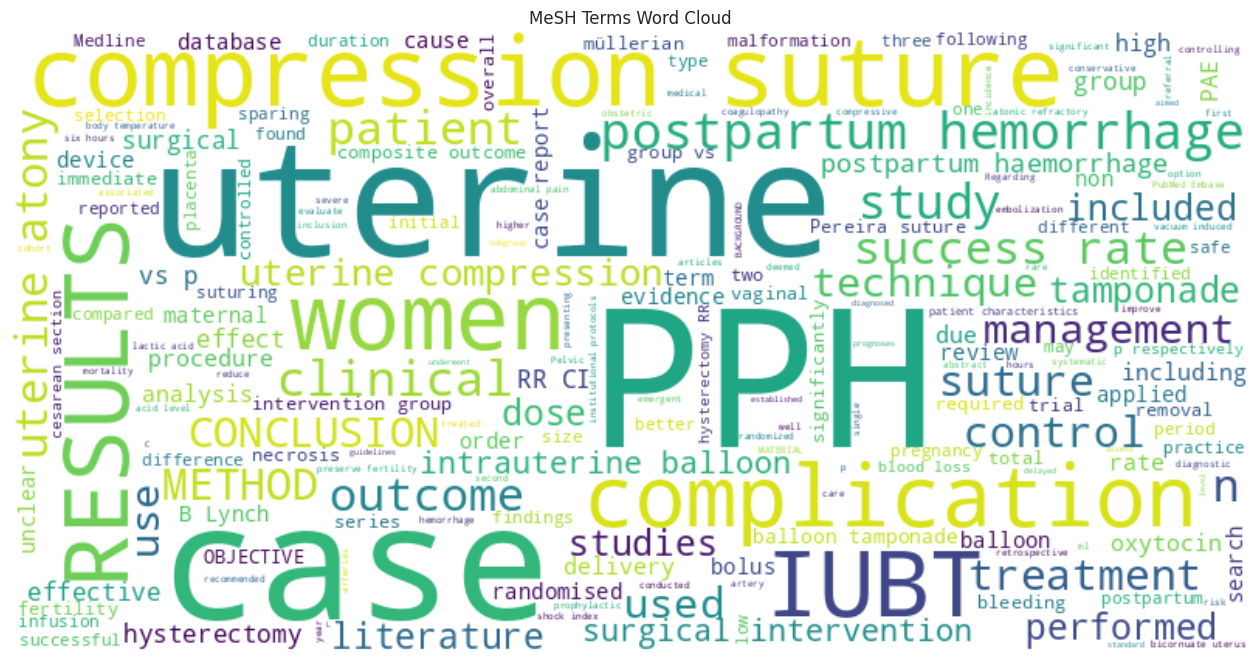

In [45]:
from wordcloud import WordCloud

# Generating the word cloud for MeSH terms
text = ' '.join(df['abstract'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(16, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('MeSH Terms Word Cloud')
plt.show()

In [46]:
df = df.drop(df.columns[0], axis=1)


In [47]:
df

,abstract,authors,chemicals,citation,doi,history,issn,journal,title,volume,volume_issue,year,url,history.1
0,BACKGROUND: No standard treatment guidelines h...,"['Jung YW', 'Kim J', 'Shin WK', 'Song SY', 'Ch...","{'D019344': {'substance_name': 'Lactic Acid', ...","Jung YW, et al. Outcomes and prognosis of post...",10.1186/s13017-024-00556-5,"{'received': datetime.datetime(2024, 4, 28, 0,...",1749-7922,World J Emerg Surg,Outcomes and prognosis of postpartum hemorrhag...,19,19(1),2024,https://ncbi.nlm.nih.gov/pubmed/39090705,"{'received': datetime.datetime(2024, 4, 28, 0,..."
1,INTRODUCTION: Uterine compressive sutures are ...,"['Cordeiro Féria B', 'Nazaré P', 'Figueiredo J...",{},"Cordeiro Féria B, et al. Efficacy, Complicatio...",10.20344/amp.20429,"{'received': datetime.datetime(2023, 8, 6, 0, ...",1646-0758,Acta Med Port,"Efficacy, Complications and Effects of Alcides...",37,37(7-8),2024,https://ncbi.nlm.nih.gov/pubmed/38447018,"{'received': datetime.datetime(2023, 8, 6, 0, ..."
2,OBJECTIVES: To describe the use of the B-Lynch...,"['Rueda-Monsalbe A', 'Sanabria-Castelblanco JE...",{},"Rueda-Monsalbe A, et al. Management of postpar...",10.18597/rcog.3989,"{'received': datetime.datetime(2022, 12, 27, 0...",2463-0225,Rev Colomb Obstet Ginecol,Management of postpartum hemorrhage in a patie...,74,74(2),2023,https://ncbi.nlm.nih.gov/pubmed/37523684,"{'received': datetime.datetime(2022, 12, 27, 0..."
3,OBJECTIVES: To present a case of uterine necro...,"['García-Guerra R', 'Assaf-Balut M', 'El-Bakka...","{'D006490': {'substance_name': 'Hemostatics', ...","García-Guerra R, et al. Uterine necrosis follo...",10.18597/rcog.3856,"{'received': datetime.datetime(2022, 4, 7, 0, ...",2463-0225,Rev Colomb Obstet Ginecol,Uterine necrosis following hemostatic compress...,73,73(4),2022,https://ncbi.nlm.nih.gov/pubmed/36637386,"{'received': datetime.datetime(2022, 4, 7, 0, ..."
4,BACKGROUND: Postpartum hemorrhage is a main ca...,"['Haslinger C', 'Weber K', 'Zimmermann R']",{},"Haslinger C, et al. Vacuum-Induced Tamponade f...",10.1097/AOG.0000000000004510,"{'received': datetime.datetime(2021, 4, 6, 0, ...",1873-233X,Obstet Gynecol,Vacuum-Induced Tamponade for Treatment of Post...,138,138(3),2021,https://ncbi.nlm.nih.gov/pubmed/34352848,"{'received': datetime.datetime(2021, 4, 6, 0, ..."
5,OBJECTIVES: To evaluate uterine tamponade devi...,"['Pingray V', 'Widmer M', 'Ciapponi A', 'Hofme...",{},"Pingray V, et al. Effectiveness of uterine tam...",10.1111/1471-0528.16819,"{'accepted': datetime.datetime(2021, 4, 16, 0,...",1471-0528,BJOG,Effectiveness of uterine tamponade devices for...,128,128(11),2021,https://ncbi.nlm.nih.gov/pubmed/34165867,"{'accepted': datetime.datetime(2021, 4, 16, 0,..."
6,"Objective-to overview, compare and generalize ...","['Baliuliene V', 'Vitartaite M', 'Rimaitis K']","{'D010120': {'substance_name': 'Oxytocics', 'r...","Baliuliene V, et al. Prophylactic Dose of Oxyt...",10.3390/ijerph18095029,"{'received': datetime.datetime(2021, 4, 8, 0, ...",1660-4601,Int J Environ Res Public Health,Prophylactic Dose of Oxytocin for Uterine Aton...,18,18(9),2021,https://ncbi.nlm.nih.gov/pubmed/34068723,"{'received': datetime.datetime(2021, 4, 8, 0, ..."
7,IMPORTANCE: Postpartum hemorrhage (PPH) is an ...,"['Zhang XQ', 'Chen XT', 'Zhang YT', 'Mai CX']",{},"Zhang XQ, et al. The Emergent Pelvic Artery Em...",10.1097/OGX.0000000000000887,"{'entrez': datetime.datetime(2021, 4, 28, 0, 0...",1533-9866,Obstet Gynecol Surv,The Emergent Pelvic Artery Embolization in the...,76,76(4),2021,https://ncbi.nlm.nih.gov/pubmed/33908615,"{'entrez': datetime.datetime(2021, 4, 28, 0, 0..."
8,BACKGROUND: Intrauterine balloon tamponade (IU...,"['Kong CW', 'To WWK']",{},Kong CW and To WWK. The Discriminant Use of In...,10.1155/2021/6648829,"{'received': datetime.datetime(2020, 10, 5, 0,...",2314-6141,Biomed Res Int,The Discriminant Use of Intrauterine Balloon T...,2021,2021,2021,https://ncbi.nlm.nih.gov/pubmed/33490275,"{'received': datetime.datetime(2020, 10, 5, 0

In [48]:
df.to_csv('drive/My Drive/cumarufinaldata.csv')